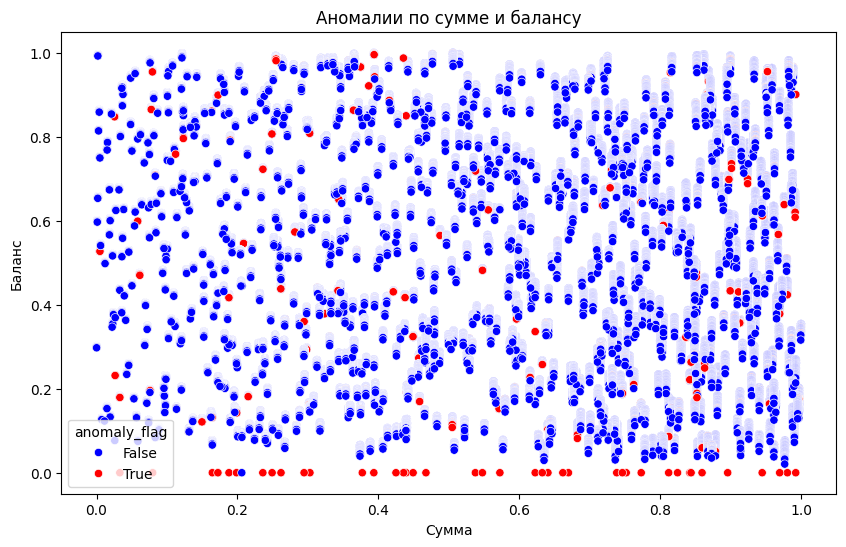

<ipython-input-4-23ef45ff85af>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['anomaly_flag'] == True], x='hour', palette='Reds')


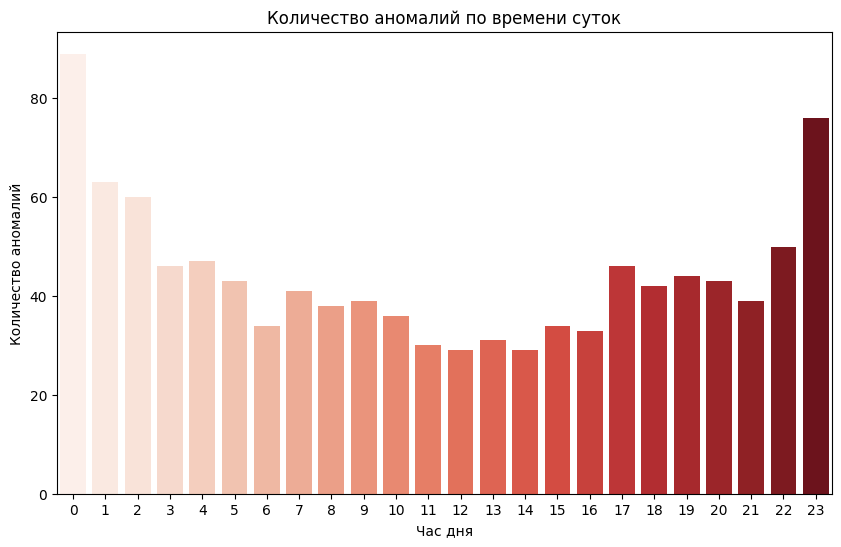

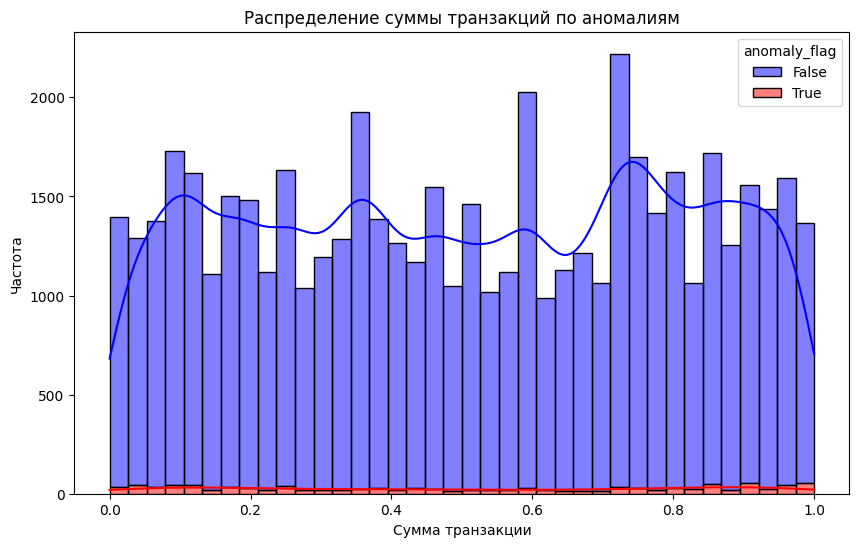

<ipython-input-4-23ef45ff85af>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['anomaly_flag'] == True], x='day_of_week', palette='Reds')


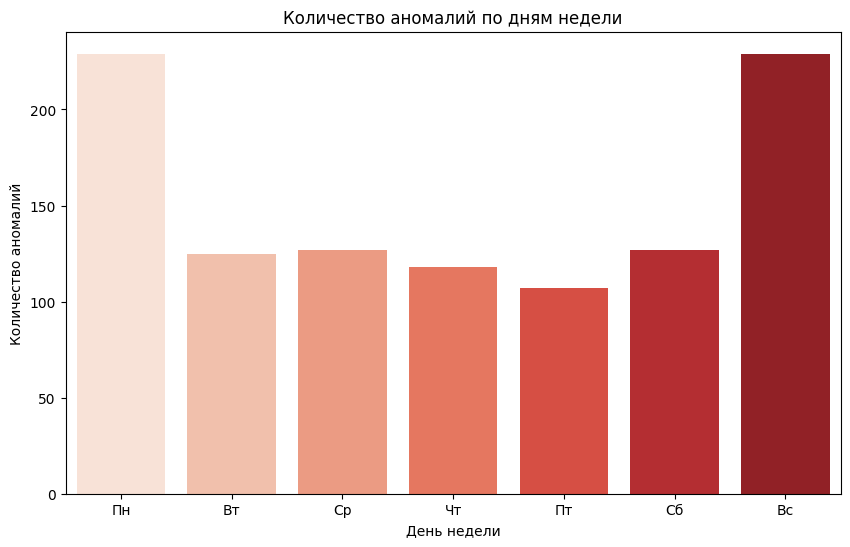

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import files

# Загрузка данных
data = pd.read_csv('dataset.csv')

# Удаление пропусков
data = data.dropna()

# Преобразование категориальных данных
le = LabelEncoder()
for col in ['device_type', 'tran_code', 'card_type', 'oper_type', 'card_status']:
    data[col] = le.fit_transform(data[col].astype(str))

# Создание временных признаков
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
if data['datetime'].isnull().any():
    raise ValueError("Некорректные значения в столбце 'datetime' после преобразования.")
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek

# Дополнительные признаки для аномалий
data['is_night'] = data['hour'].between(0, 6)  # Ночь с 0 до 6 часов

# Аномалии по балансу
balance_mean = data['balance'].mean()
balance_std = data['balance'].std()
data['balance_anomaly'] = (data['balance'] > balance_mean + 3 * balance_std) | (data['balance'] < balance_mean - 3 * balance_std)

# Аномалии по сумме
sum_mean = data['sum'].mean()
sum_std = data['sum'].std()
data['sum_anomaly'] = (data['sum'] > sum_mean + 3 * sum_std) | (data['sum'] < sum_mean - 3 * sum_std)

# Нормализация числовых данных
scaler = MinMaxScaler()
data[['sum', 'balance', 'pin_inc_count']] = scaler.fit_transform(data[['sum', 'balance', 'pin_inc_count']])

# Инициализация модели Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)

# Обучение модели на выбранных признаках
features = ['sum', 'balance', 'pin_inc_count', 'device_type', 'hour', 'day_of_week', 'tran_code', 'oper_type', 'card_status']
model.fit(data[features])

# Предсказание аномалий (-1 = аномалия, 1 = нормальная транзакция)
data['anomaly'] = model.predict(data[features])

# Преобразование предсказаний аномалии в True (анализ) и False (нормально)
data['anomaly_flag'] = data['anomaly'] == -1

# Визуализация аномалий

# 1. Scatter Plot: аномалии по сумме и балансу
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sum', y='balance', hue='anomaly_flag', palette={True: 'red', False: 'blue'})
plt.title("Аномалии по сумме и балансу")
plt.xlabel("Сумма")
plt.ylabel("Баланс")
plt.show()

# 2. Count Plot: количество аномалий по времени суток
plt.figure(figsize=(10, 6))
sns.countplot(data=data[data['anomaly_flag'] == True], x='hour', palette='Reds')
plt.title("Количество аномалий по времени суток")
plt.xlabel("Час дня")
plt.ylabel("Количество аномалий")
plt.show()

# 3. Histogram: распределение суммы транзакций для нормальных и аномальных данных
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='sum', hue='anomaly_flag', multiple="stack", kde=True, palette={True: 'red', False: 'blue'})
plt.title("Распределение суммы транзакций по аномалиям")
plt.xlabel("Сумма транзакции")
plt.ylabel("Частота")
plt.show()

# 4. Визуализация активности по дням недели
plt.figure(figsize=(10, 6))
sns.countplot(data=data[data['anomaly_flag'] == True], x='day_of_week', palette='Reds')
plt.title("Количество аномалий по дням недели")
plt.xlabel("День недели")
plt.ylabel("Количество аномалий")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])  # Переименовываем метки
plt.show()

# Сохранение данных с аномалиями в CSV файл
output_path = '/content/preds.csv'
data[['anomaly_flag']].to_csv(output_path, index=False)

# Скачивание файла на локальное устройство
files.download(output_path)


0.9623134971506135

F1-Score (Train): 0.0
F1-Score (Test): 0.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10611
           1       0.00      0.00      0.00         5

    accuracy                           1.00     10616
   macro avg       0.50      0.50      0.50     10616
weighted avg       1.00      1.00      1.00     10616



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


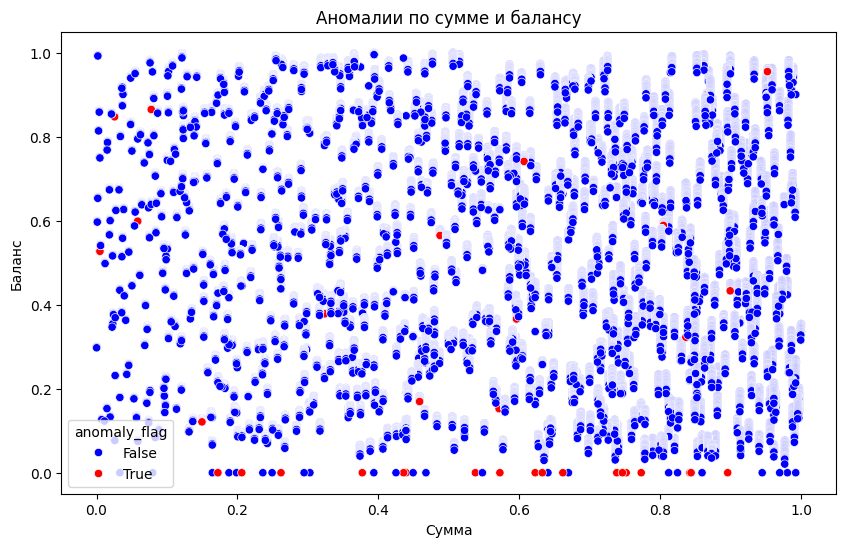

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Загрузка данных
data_path = '/content/dataset.csv'
data = pd.read_csv(data_path)

# Удаление пропусков
data = data.dropna()

# Преобразование категориальных данных
le = LabelEncoder()
for col in ['device_type', 'tran_code', 'card_type', 'oper_type', 'card_status']:
    data[col] = le.fit_transform(data[col].astype(str))

# Создание временных признаков
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek

# Нормализация числовых данных
scaler = MinMaxScaler()
data[['sum', 'balance', 'pin_inc_count']] = scaler.fit_transform(data[['sum', 'balance', 'pin_inc_count']])

# Признаки для модели
features = ['sum', 'balance', 'pin_inc_count', 'device_type', 'hour',
            'day_of_week', 'tran_code', 'oper_type', 'card_status']

X = data[features]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 1. **Использование K-Nearest Neighbors для аномалий**
knn = NearestNeighbors(n_neighbors=20)
knn.fit(X_train)

# Для каждой точки вычисляем расстояния до ближайших соседей
distances, _ = knn.kneighbors(X_train)

# Расстояния до ближайших соседей могут помочь нам выделить аномалии
threshold = 0.8 * distances.max()  # Задаем порог для аномалий
y_train_pred = (distances[:, -1] > threshold).astype(int)

# Тестируем на тестовой выборке
distances_test, _ = knn.kneighbors(X_test)
y_test_pred = (distances_test[:, -1] > threshold).astype(int)

# Оценка метрик
print(f"F1-Score (Train): {f1_score(y_train_pred, [0] * len(y_train_pred))}")
print(f"F1-Score (Test): {f1_score(y_test_pred, [0] * len(y_test_pred))}")
print(f"Classification Report (Test):\n{classification_report(y_test_pred, [0] * len(y_test_pred))}")

# Визуализация
data['anomaly_flag'] = knn.kneighbors(X[features])[0][:, -1] > threshold  # Метки аномалий для всех данных
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sum', y='balance', hue='anomaly_flag', palette={True: 'red', False: 'blue'})
plt.title("Аномалии по сумме и балансу")
plt.xlabel("Сумма")
plt.ylabel("Баланс")
plt.show()

# Сохранение результатов в CSV файл
output_path = '/content/preds_with_knn.csv'
data[['anomaly_flag']].to_csv(output_path, index=False)

# Скачивание файла
files.download(output_path)


0.9665502138825453

Fitting 3 folds for each of 3780 candidates, totalling 11340 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1134 fits failed out of a total of 11340.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
567 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 886, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_unsupervised.py", line 176, in fit
    return self._fit(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn

Лучшие параметры KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 3, 'p': 1}
F1-Score (Train): 0.0
F1-Score (Test): 0.0
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10616
           1       0.00      0.00      0.00         0

    accuracy                           1.00     10616
   macro avg       0.50      0.50      0.50     10616
weighted avg       1.00      1.00      1.00     10616



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


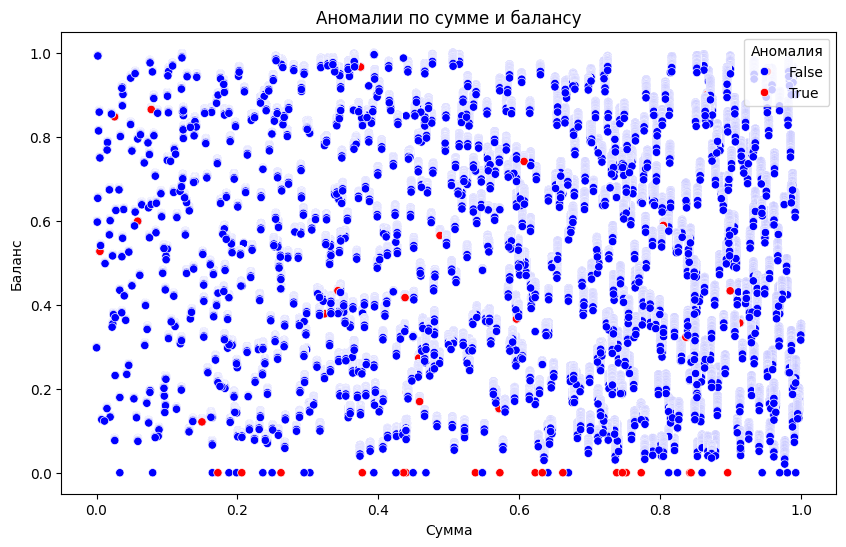

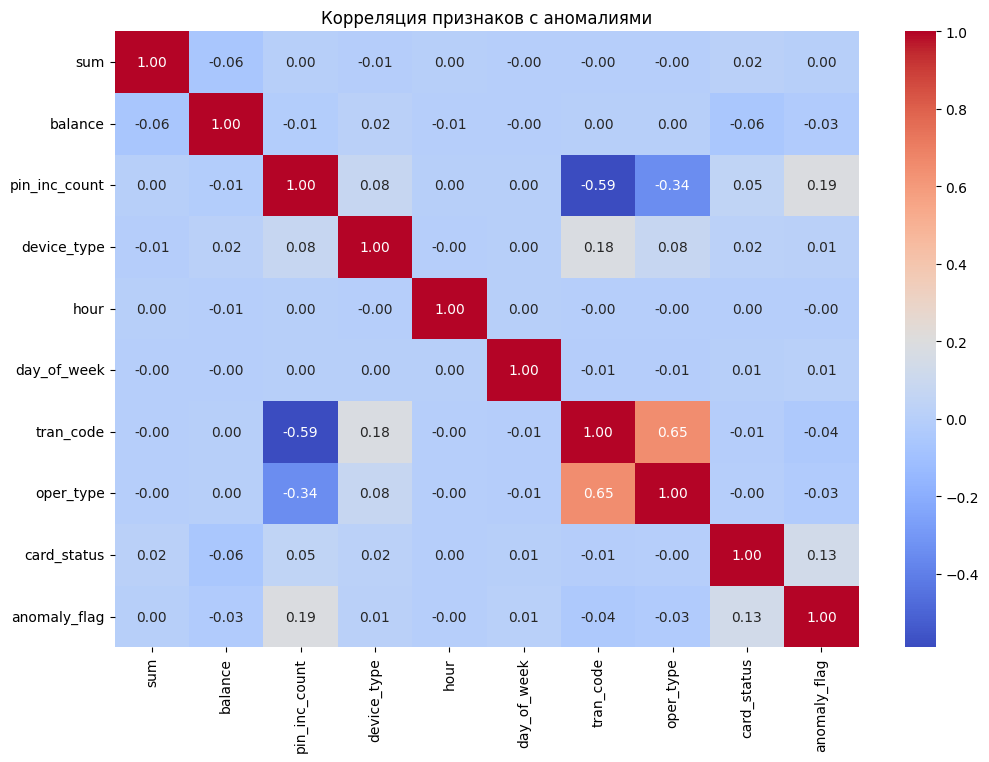

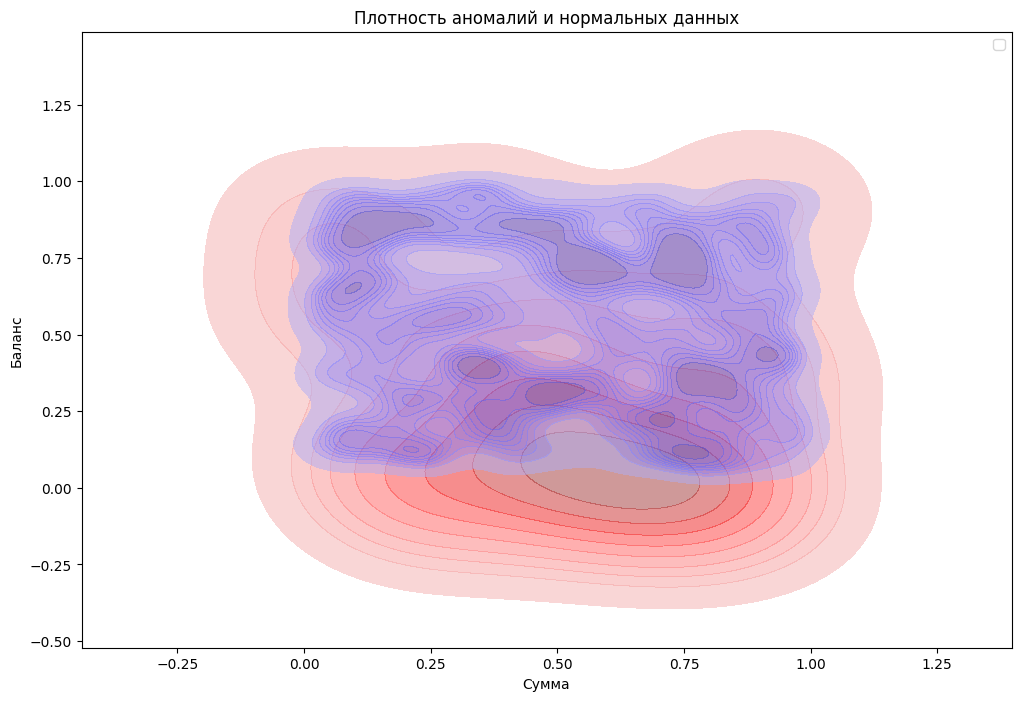

Количество аномальных операций:
anomaly_flag
False    53038
True        41
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Загрузка данных
data_path = '/content/dataset.csv'
data = pd.read_csv(data_path)

# Удаление пропусков
data = data.dropna()

# Преобразование категориальных данных
le = LabelEncoder()
for col in ['device_type', 'tran_code', 'card_type', 'oper_type', 'card_status']:
    data[col] = le.fit_transform(data[col].astype(str))

# Создание временных признаков
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek

# Нормализация числовых данных
scaler = MinMaxScaler()
data[['sum', 'balance', 'pin_inc_count']] = scaler.fit_transform(data[['sum', 'balance', 'pin_inc_count']])

# Признаки для модели
features = ['sum', 'balance', 'pin_inc_count', 'device_type', 'hour',
            'day_of_week', 'tran_code', 'oper_type', 'card_status']

X = data[features]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Определение модели KNN для поиска аномалий
knn = NearestNeighbors()

# Параметры для оптимизации
param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20, 30, 50, 70, 100],  # Количество ближайших соседей
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'minkowski'],  # Метрики расстояния
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Алгоритмы поиска
    'leaf_size': [10, 20, 30, 40, 50, 70, 100],  # Размер листа в деревьях
    'p': [1, 2, 3],  # Параметр для метрики Minkowski
    'n_jobs': [-1]  # Использовать все процессоры
}


# Подбор гиперпараметров через GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Обучение на тренировочных данных
grid_search.fit(X_train)

# Лучшие параметры
print("Лучшие параметры KNN:", grid_search.best_params_)

# Получаем лучшую модель
best_knn = grid_search.best_estimator_

# Для каждой точки вычисляем расстояния до ближайших соседей с лучшими гиперпараметрами
distances, _ = best_knn.kneighbors(X_train)

# Расстояния до ближайших соседей могут помочь нам выделить аномалии
threshold = 0.8 * distances.max()  # Задаем порог для аномалий
y_train_pred = (distances[:, -1] > threshold).astype(int)

# Тестируем на тестовой выборке
distances_test, _ = best_knn.kneighbors(X_test)
y_test_pred = (distances_test[:, -1] > threshold).astype(int)

# Оценка метрик
print(f"F1-Score (Train): {f1_score(y_train_pred, [0] * len(y_train_pred))}")
print(f"F1-Score (Test): {f1_score(y_test_pred, [0] * len(y_test_pred))}")
print(f"Classification Report (Test):\n{classification_report([0] * len(y_test_pred), y_test_pred)}")

# Визуализация 1: Аномалии по сумме и балансу
data['anomaly_flag'] = best_knn.kneighbors(X[features])[0][:, -1] > threshold  # Метки аномалий для всех данных
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sum', y='balance', hue='anomaly_flag', palette={True: 'red', False: 'blue'})
plt.title("Аномалии по сумме и балансу")
plt.xlabel("Сумма")
plt.ylabel("Баланс")
plt.legend(title='Аномалия', loc='upper right')
plt.show()

# Визуализация 2: Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(data[features + ['anomaly_flag']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков с аномалиями")
plt.show()

# Визуализация 3: Плотность точек для аномалий и нормальных данных
plt.figure(figsize=(12, 8))
sns.kdeplot(x=data[data['anomaly_flag'] == 1]['sum'], y=data[data['anomaly_flag'] == 1]['balance'],
            color='red', label='Аномалии', fill=True, alpha=0.5)
sns.kdeplot(x=data[data['anomaly_flag'] == 0]['sum'], y=data[data['anomaly_flag'] == 0]['balance'],
            color='blue', label='Нормальные', fill=True, alpha=0.5)
plt.title("Плотность аномалий и нормальных данных")
plt.xlabel("Сумма")
plt.ylabel("Баланс")
plt.legend()
plt.show()

# Вывод статистики по аномалиям
print("Количество аномальных операций:")
print(data['anomaly_flag'].value_counts())

# Сохранение результатов в CSV файл
output_path = '/content/preds_with_optimal_knn.csv'
data[['anomaly_flag']].to_csv(output_path, index=False)

# Скачивание файла
files.download(output_path)


0.9909500556194498

Fitting 3 folds for each of 3780 candidates, totalling 11340 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1134 fits failed out of a total of 11340.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
567 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 886, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_unsupervised.py", line 176, in fit
    return self._fit(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn

Лучшие параметры KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 3, 'p': 1}
F1-Score (Train): 0.9855072463768116
F1-Score (Test): 0.8333333333333334
Classification Report (Test):
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10609
        True       1.00      0.71      0.83         7

    accuracy                           1.00     10616
   macro avg       1.00      0.86      0.92     10616
weighted avg       1.00      1.00      1.00     10616



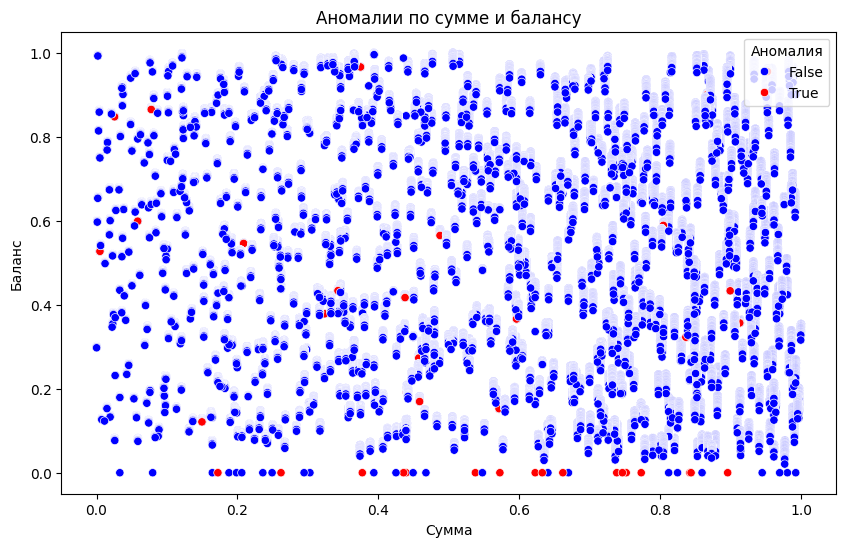

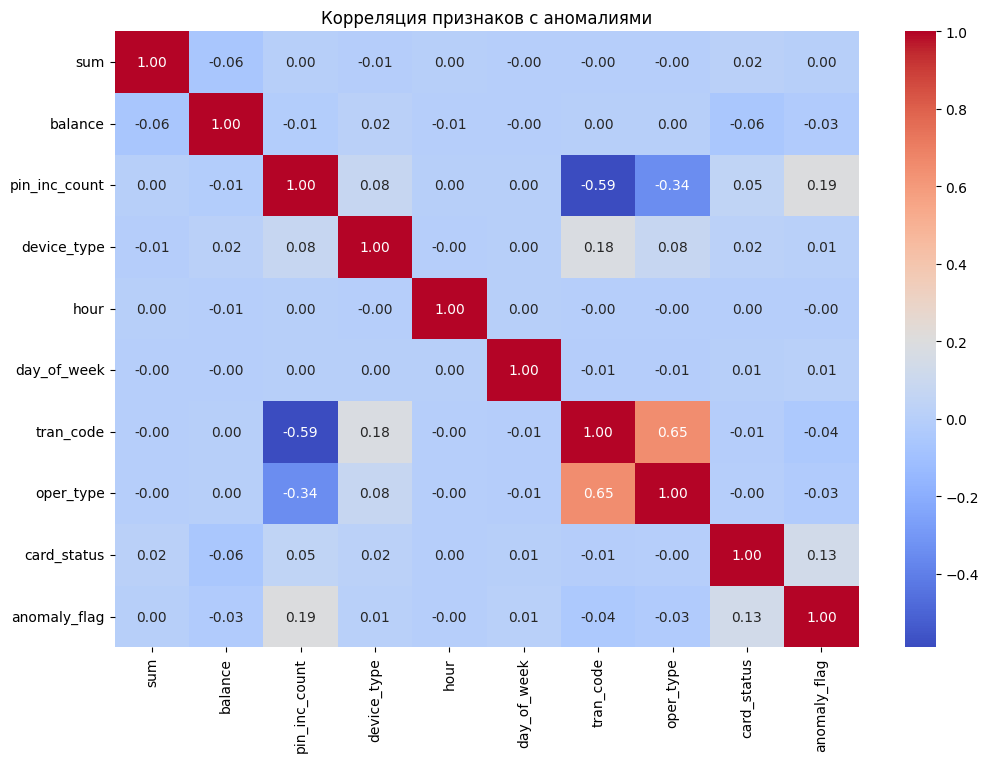

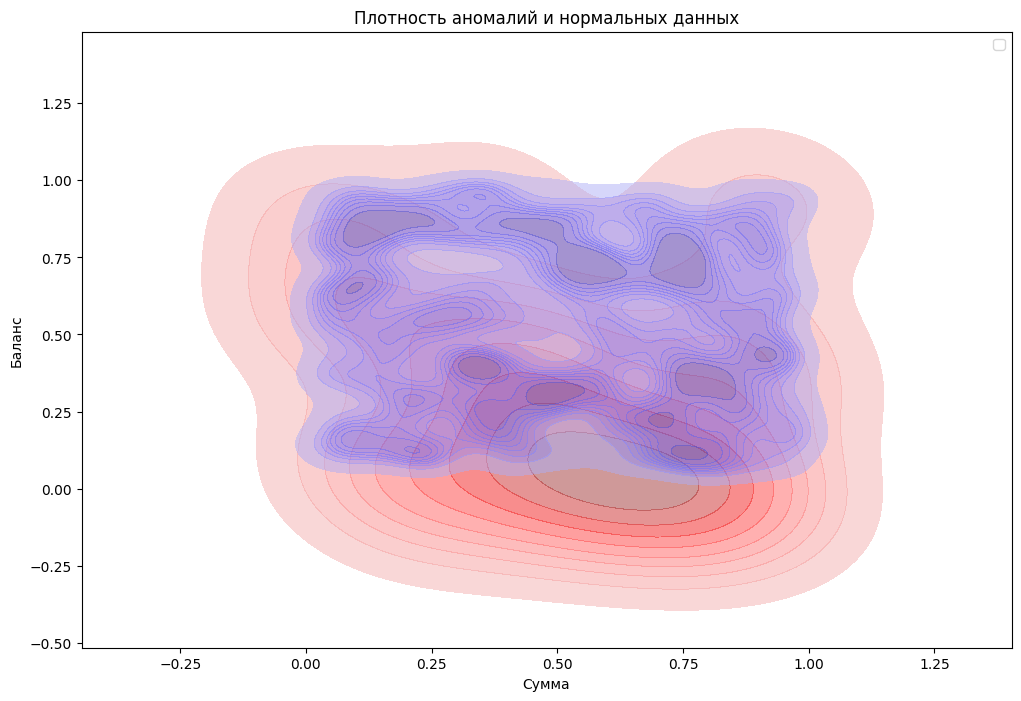

Количество аномальных операций:
anomaly_flag
False    53039
True        40
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

# Загрузка данных
data_path = '/content/dataset.csv'
data = pd.read_csv(data_path)

# Удаление пропусков
data = data.dropna()

# Преобразование категориальных данных
le = LabelEncoder()
for col in ['device_type', 'tran_code', 'card_type', 'oper_type', 'card_status']:
    data[col] = le.fit_transform(data[col].astype(str))

# Создание временных признаков
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek

# Нормализация числовых данных
scaler = MinMaxScaler()
data[['sum', 'balance', 'pin_inc_count']] = scaler.fit_transform(data[['sum', 'balance', 'pin_inc_count']])

# Признаки для модели
features = ['sum', 'balance', 'pin_inc_count', 'device_type', 'hour',
            'day_of_week', 'tran_code', 'oper_type', 'card_status']

X = data[features]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Определение модели KNN для поиска аномалий
knn = NearestNeighbors()

# Параметры для оптимизации
param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20, 30, 50, 70, 100],  # Количество ближайших соседей
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'minkowski'],  # Метрики расстояния
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Алгоритмы поиска
    'leaf_size': [10, 20, 30, 40, 50, 70, 100],  # Размер листа в деревьях
    'p': [1, 2, 3],  # Параметр для метрики Minkowski
    'n_jobs': [-1]  # Использовать все процессоры
}

# Подбор гиперпараметров через GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

# Обучение модели с подбором параметров
grid_search.fit(X_train)

# Лучшие параметры
print("Лучшие параметры KNN:", grid_search.best_params_)

# Получаем лучшую модель
best_knn = grid_search.best_estimator_

# Расстояния до ближайших соседей для обучения
distances, _ = best_knn.kneighbors(X_train)

# Задание порога для аномалий
threshold = 0.8 * distances.max()

# Создание меток для обучения (True - аномалия, False - нормальная точка)
y_train = (distances[:, -1] > threshold)
y_test = (best_knn.kneighbors(X_test)[0][:, -1] > threshold)

# Определение моделей
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Создание VotingClassifier (мягкое голосование)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('lr', lr)
], voting='soft')

# Обучение на тренировочных данных с метками
voting_clf.fit(X_train, y_train)

# Получение предсказаний
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)

# Оценка метрик
print(f"F1-Score (Train): {f1_score(y_train, y_train_pred)}")
print(f"F1-Score (Test): {f1_score(y_test, y_test_pred)}")
print(f"Classification Report (Test):\n{classification_report(y_test, y_test_pred)}")

# Визуализация 1: Аномалии по сумме и балансу
data['anomaly_flag'] = voting_clf.predict(X[features])  # Метки аномалий для всех данных
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sum', y='balance', hue='anomaly_flag', palette={True: 'red', False: 'blue'})
plt.title("Аномалии по сумме и балансу")
plt.xlabel("Сумма")
plt.ylabel("Баланс")
plt.legend(title='Аномалия', loc='upper right')
plt.show()

# Визуализация 2: Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(data[features + ['anomaly_flag']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков с аномалиями")
plt.show()

# Визуализация 3: Плотность точек для аномалий и нормальных данных
plt.figure(figsize=(12, 8))
sns.kdeplot(x=data[data['anomaly_flag'] == True]['sum'], y=data[data['anomaly_flag'] == True]['balance'],
            color='red', label='Аномалии', fill=True, alpha=0.5)
sns.kdeplot(x=data[data['anomaly_flag'] == False]['sum'], y=data[data['anomaly_flag'] == False]['balance'],
            color='blue', label='Нормальные', fill=True, alpha=0.5)
plt.title("Плотность аномалий и нормальных данных")
plt.xlabel("Сумма")
plt.ylabel("Баланс")
plt.legend()
plt.show()

# Вывод статистики по аномалиям
print("Количество аномальных операций:")
print(data['anomaly_flag'].value_counts())

# Сохранение результатов в CSV файл
output_path = '/content/preds_with_optimal_knn.csv'
data[['anomaly_flag']].to_csv(output_path, index=False)

# Скачивание файла
files.download(output_path)